# Определение закономерностей успешности игры для интернет-магазина

Заказчик исследования - интернет-магазин "Стримчик", продающий по всему миру компьютерные игры. Нужно разобраться, какие закономерности имеются у успешных за последнее время игр. Входные данные от компании - исторические данные из открытых источников о продажах игр, их оценках и жанрах до 2016 года. Наша задача - по этим выборочным данным провести анализ и обнаружить закономерности успешности.

Результаты исследования будут учтены при планировании рекламной компании на 2017 год.

**Цель исследования**: выявить закономерности успешности игры за последнее время

Ход исследования:

Входные данные от компании - статистика продаж игр различных жанров и годов до 2016 по трём регионам. О качестве данных ничего неизвестно, поэтому понадобится обзор данных. Полученные данные будут проверены на возможные ошибки или дубликаты и, в случае необходимости, исправлены. После этого составим портрет пользователя каждого региона и далее проведём исследовательский анализ данных. В завершении разберёмся со статистическими гипотезами по данным. 

Таким образом, исследование пройдёт в 5 этапов:

* 1. Изучение данных из файлов.
* 2. Предобработка данных.
* 3. Исследовательский анализ данных.
* 4. Составление портретов пользователей.
* 5. Статистический анализ данных.

## Изучение данных из файлов

Перед тем, как приступать к изучению данных из файлов, импортируем все необходимые для текущего исследования библиотеки:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

Прочитаем полученные данные и сохраним их в таблице `df`, после чего выведем на экран таблицу:

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видно, что в таблице 16715 строк и 11 столбцов. Получим общую информацию о таблице:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашей таблице представлено 11 столбцов, 6 из которых имеют тип данных float, 5 - object. Обнаружились пропуски: в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Придётся разобраться с ними на этапе предобработки данных. Некоторые столбцы также имеют некорректный для них тип данных, что возникло, в том числе, из-за пропущенных значений: `User_Score`, `Year_of_Release`. Также названия самих столбцов представлены с верхним регистром, хотя лучше в `Python` использовать нижний. Согласно документации к данным:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

В таблице имеются данные об играх, их жанрах, годах выпуска, рейтингах и оценках. Предварительно можно утверждать, что данных достаточно для выявления закономерностей успешных игр. С другой стороны, в данных имеются проблемы, с которыми предстоит разобраться на этапе предобработки данных, а именно: названия столбцов в верхнем регистре, большое количество пропусков в различных столбцах, некорректные типы данных. Можем предположить, что пропуски появились из-за того, что какие-то игры не получили ни одной оценки, либо они не были представлены на сайтах, где эти оценивания происходят. 

Чтобы двигаться дальше, необходимо устранить проблемы в данных.

## Предобработка данных

Сначала заменим названия столбцов на названия с нижним регистром:

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия столбцов точно соответствуют языку программирования. 

Посчитаем суммарные продажи игр во всех регионах и запишем их в отдельный столбец. Это пригодится нам, чтобы оценивать полные сборы той или иной игры, а не только её показатели в отдельных регионах.

In [5]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Данный столбец ещё понадобится нам этапе исследовательского анализа, а пока можем переходить к обработке пропущенных значений.

### Обработка пропущенных значений

У нас есть по 2 пропуска в столбцах `name` и `genre`. Предположим, что они связаны друг с другом. Выведем на экран те строки, где есть пропуск в обоих столбцах: 

In [6]:
#выводим на экран строки с пропусками в столбцах `name` и `genre` одновременно
df[df['name'].isnull() & df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Как и предполагалось, 2 этих пропуска взаимосвязаны друг с другом. Более того, они не имеют никаких значений по оценкам и рейтингу. Заполнять название и жанр игры не представляется возможным, поэтому исключим строки из нашей таблицы. Потеря двух строк никак не повлияет на качество исследования:

In [7]:
#исключаем из таблицы строки с пропущенным `name`, чтобы убрать лишь ненужные строки
df = df.dropna(subset=['name']).reset_index(drop=True)

Изучим пропуски в столбце `year_of_release`. Посмотрим, можно ли вывести какие-то закономерности по этим пропускам. Для этого выведем данные таблицы с пропущенными значениями в столбце `year_of_release`:

In [8]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Обнаруживаем, что, в целом, игры можно было бы категоризировать по платформе. На некоторые платформы игры выходили только в определённые периоды времени, поэтому их даты релизов не будут сильно отставать друг от друга. Следовательно, на основании этого мы сможем избавиться от пропусков. Для начала сгруппируем наши игры по платформам и для каждой посчитаем средний год выхода:

In [9]:
year_means = df.groupby('platform')['year_of_release'].mean().astype('int')
year_means

platform
2600    1982
3DO     1994
3DS     2013
DC      1999
DS      2008
GB      1995
GBA     2003
GC      2003
GEN     1993
GG      1992
N64     1998
NES     1987
NG      1994
PC      2008
PCFX    1996
PS      1998
PS2     2004
PS3     2010
PS4     2015
PSP     2008
PSV     2014
SAT     1996
SCD     1993
SNES    1993
TG16    1995
WS      2000
Wii     2008
WiiU    2013
X360    2009
XB      2003
XOne    2014
Name: year_of_release, dtype: int64

Платформ накопилось достаточно много. Теперь заполним наши пропуски рассчитанными средними значениями. Для этого напишем функцию и вызовем её:

In [10]:
#создаём функцию по заполнению пропущенных годов выпуска по сгруппированным средним для платформ и вызываем её
def func_year(row):
    if pd.isna(row['year_of_release']):
        return year_means.loc[row['platform']]
    return row['year_of_release']
 
df['year_of_release'] = df.apply(func_year, axis=1)

Теперь необходимо обработать пропуски в столбцах `critic_score`, `user_score`. Пропуски в этих столбцах можно объяснить тем, что игры практически не продавались, либо вышли так рано, что сайтов с отзывами ещё не существовало. Никакие заполнения этих столбцов не могут дать даже приблизительную оценку сообщества и экспертов, потому что даже любимые жанры порой получают худшие оценки. Будет лучше эти пропуски заполнить значениями `-1`, чтобы не оставлять NaN и в то же время не судить о качестве игр за других. Заполнение -1 поможет нам позже понять, что эти игры не имеют какого-либо рейтинга:

In [11]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Пропуски остались лишь в столбце `rating`, где можно узнать о возрастных ограничениях игры. Судя по специфики переменной, заполнить самостоятельно мы её вновь не сможем, однако можно пометить неизвестные значения, чтобы при необходимости исследовать лишь те игры, для которых это ограничение известно. На место всех пропусков в данном столбце поставим `unknown`:

In [12]:
df['rating'] = df['rating'].fillna('unknown')

Пропусков не осталось, однако всё же не все проблемы устранены. В столбце `user_score` есть особое обозначение `tbd`, означающее, что рейтинг игры будет определён позднее. Посмотрим на такие игры:

In [13]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E,0.01


2424 игры - достаточно большое количество, поэтому исключать их никак нельзя. Более того, у некоторых из них уже идут активные продажи и имеются оценки критиков. Нам важно отличать эти игры от тех, которые никакого рейтинга не имеют вовсе, поэтому заменим эти значения на нули. Таким образом, мы поймём, что этот рейтинг может скоро измениться:

In [14]:
df['user_score'] = df['user_score'].replace({'tbd': 0})

### Замена типов данных

После обработки всех пропусков можем изменять типы данных там, где это необходимо. Как уже отмечалось ранее, это нужно сделать для столбцов `year_of_release` и `user_score`. Начнём с первого, где необходимо перевести года из `float` в `int`:

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')

Теперь заменим тип данных во втором столбце. Из-за обозначений `tbd` тип данных был `object`, но, так как теперь мы заменили эту аббревиатуру нулями, мы можем смело перевести столбец во `float`:

In [16]:
df['user_score'] = df['user_score'].astype('float')

### Вывод

На этапе предобработки данных мы устранили все проблемы с данными, которые могли исказить исследование:

* Привели названия столбцов в нижний регистр
* Обработали все пропуски в таблице
* Заменили типы данных в столбцах `year_of_release` и `user_score`

При этом, про пропуски стоит упомянуть, что исключений из таблицы совершилось всего 2 - для игр без имени. Пропуски по рейтингу были заполнены -1, чтобы далее помнить об отсутствии рейтинга у этих игр, а если игра лишь ожидает свой рейтинг, то пока она будет иметь в этом столбце 0. Пропущенные года игр были проставлены при помощи категоризации платформ. 

Далее можем переходить к исследовательскому анализу данных.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в различные годы. Данная статистика поможет нам понять, какие года наиболее важно рассматривать.

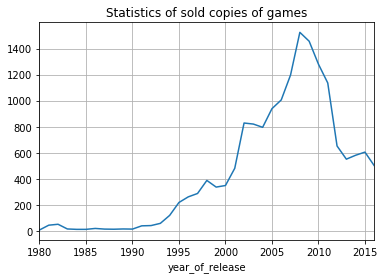

In [17]:
#группируем таблицу по году выхода игры и считаем количество игр в каждом году, после чего строим линейный график
plt = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count') \
                    .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games')

По графику видно, что между 1980 и 1990 годами игр практически не выходило. Значит, скорее всего любая вышедшая игра сразу должна была иметь хорошие показатели, ведь это всё было совсем новинкой для людей. Яркий подъём индустрии намечается в 1990 и далее. Пик же находится примерно в 2008 году, после чего несколько лет количество игр уменьшается. Быть может, разработчики стали делать меньше игр, но сильно качественнее предыдущих, чтобы выделиться в индустрии и привлечь пользователя. 

Посмотрим, сколько игр вышло до 1990 года:

In [18]:
print("До 1990 игр вышло:", df.query('year_of_release < 1990')['name'].count())

До 1990 игр вышло: 222


222 игры. Это чуть более 1% наших данных. Мы можем отбросить эти игры, чтобы они не искажали результаты нашего исследования.

In [19]:
df = df.query('year_of_release >= 1990 ')

Посмотрим, как менялись продажи по платформам. Для этого воспользуемся созданным столбцом со суммарными продажи: 

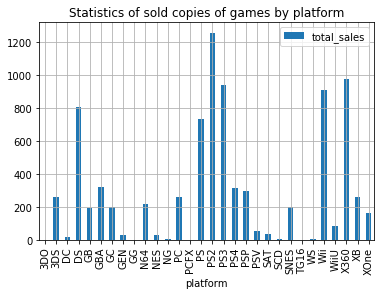

In [20]:
#группируем таблицу по платформе игр и считаем продажи для каждой платформы, после чего строим столбчатую диаграмму
plt = pd.pivot_table(df, index='platform', values='total_sales', aggfunc='sum') \
                    .plot(kind='bar', grid=True, title='Statistics of sold copies of games by platform')

Обнаруживаем, игры на каких платформах наиболее часто покупались. Большая часть платформ имеет средние показатели, однако есть и такие, которые практически ничего не успели продать своим пользователям. Однако, нам важнее обратить внимание на лидеров. Подробнее рассмотрим платформы, где было продано более 800 миллионов копий игр суммарно: `DS`, `PS2`, `PS3`, `Wii`, `X360`. Для каждой построим распределение по годам:

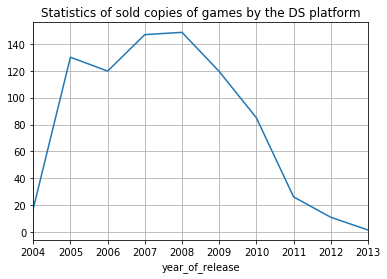

In [21]:
plt = pd.pivot_table(df.query('platform == "DS"'), index='year_of_release', values='total_sales', aggfunc='sum') \
                     .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games by the DS platform')

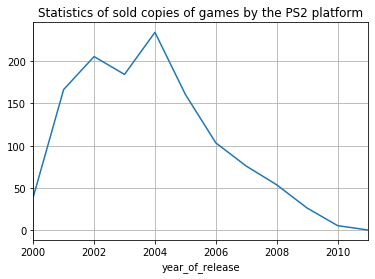

In [22]:
plt = pd.pivot_table(df.query('platform == "PS2"'), index='year_of_release', values='total_sales', aggfunc='sum') \
                     .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games by the PS2 platform')

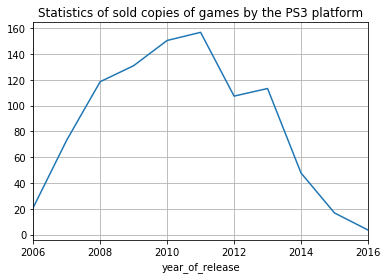

In [23]:
plt = pd.pivot_table(df.query('platform == "PS3"'), index='year_of_release', values='total_sales', aggfunc='sum') \
                     .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games by the PS3 platform')

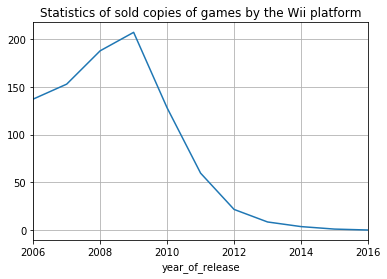

In [24]:
plt = pd.pivot_table(df.query('platform == "Wii"'), index='year_of_release', values='total_sales', aggfunc='sum') \
                     .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games by the Wii platform')

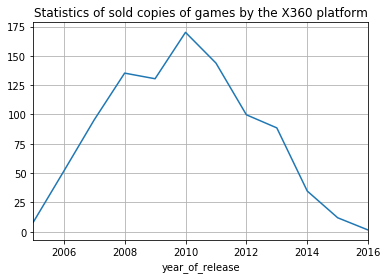

In [25]:
plt = pd.pivot_table(df.query('platform == "X360"'), index='year_of_release', values='total_sales', aggfunc='sum') \
                    .plot(kind='line', legend=False, grid=True, title='Statistics of sold copies of games by the X360 platform')

Из этих диаграмм видно, что срок жизни платформы, в среднем, составляет около 10 лет, однако лучше ограничивать это 6 годами, так как в первые года платформы только развиваются, а в последние, что видно, довольно часто "доживают" свои дни.

Нам необходимо построить прогноз на 2017 год, поэтому мы должны использовать лишь самую актуальную информацию. Мы уже исключили из таблицы данные до 1990 года, однако этого мало. Мы обнаружили, что после 2008 года в индустрии начинается новый период, вероятно связанный с опорой производителей не на количество, а на качество. Также срок жизни платформ показывает, что платформы наиболее активно живут около 6-10 лет. Тогда для наших оценок ограничим наши данные периодом от 2010 года и после, чтобы получить наиболее объективные оценки по 2017 году: 

In [26]:
df_actual = df.query('year_of_release >= 2010')

In [27]:
print("Количество игр после изменений таблицы:", df_actual['name'].count())

Количество игр после изменений таблицы: 5311


Теперь рассмотрим, какие платформы на актуальных данных лидируют по продажам, какие растут или падают:

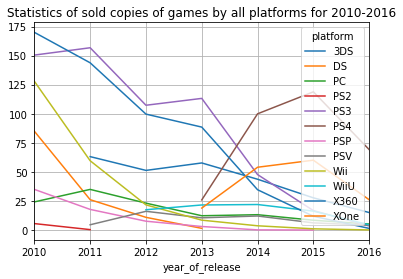

In [28]:
#группируем данные по годам и платформам и считаем их общие продажи по годам, на основании чего строим линейные графики в одном
plt = pd.pivot_table(df_actual, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
        .plot(kind='line', legend=True, grid=True, title='Statistics of sold copies of games by all platforms for 2010-2016')

График получается очень насыщенный, но основная необходимая информация на нём представлена. Из графика видно, что по продажам за последние года лидируют `PS3`, `PS4`, `XOne`, `X360`. Особо активный рост замечен у `PS4` и `XOne`, когда остальные платформы либо держатся на одном уровне, либо их продажи падают.

Рассмотрим подробнее две эти платформы и построим по ним "ящики с усами". Начнём с `PS4`:

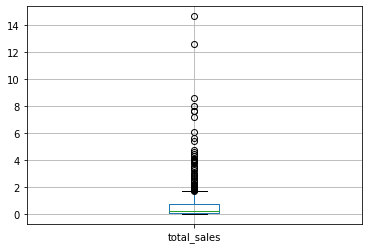

In [29]:
boxplot = df_actual.query('platform == "PS4"').boxplot(column='total_sales')

Ящик показывает, что большая часть игр в среднем не достигает отметки даже в 1 миллион копий, а основная масса игр, которые делают платформу столь растущей, это выбросы. Для игровой индустрии это обычная ситуация, ведь действительно интересных и увлекательных для пользователей игр не так много, а порой даже пара из них может привлечь пользователя на новую платформу. Посмотрим, похожая ли ситуация у `XOne`:

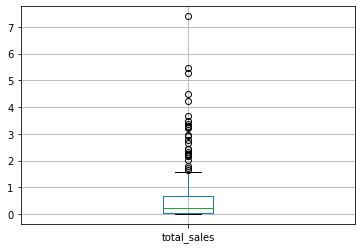

In [53]:
boxplot = df_actual.query('platform == "XOne"').boxplot(column='total_sales')

И вновь та же ситуация. С другой стороны, тут нет выбросов по 12 и более миллионов, как на `PS4`. Вероятно, это связано с играми, которые эксклюзивно выходили лишь на одну платформу. Проверим, так ли это на самом деле:

In [31]:
df_actual.query('platform == "PS4" and total_sales > 12')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Результат отрицательный. Эти игры сегодня представлены на обоих платформах, но именно на `PS4` они добились больших результатов. Возможно, на момент выгрузки игры были исключительно на `PS4`. 

Посмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. Для этого построим диаграммы рассеяния для платформы `XOne` по тем играм, где рейтинг выше 0:

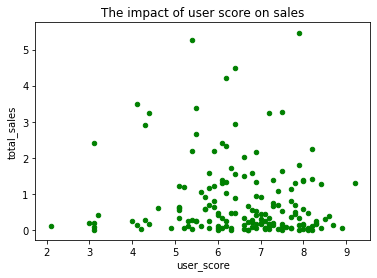

In [50]:
df_actual_scatter = df_actual.query('user_score > 0 and critic_score > 0 and platform == "XOne"')
plt = df_actual_scatter.plot.scatter(x='user_score', y='total_sales', c='green', title='The impact of user score on sales')

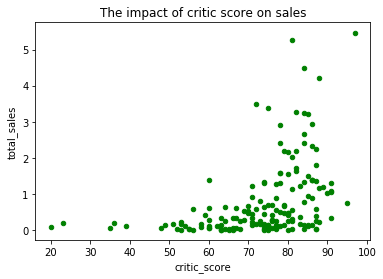

In [51]:
plt = df_actual_scatter.plot.scatter(x='critic_score', y='total_sales', c='green', title='The impact of critic score on sales')

По графикам четких зависимостей вывести не представляется возможным. Наблюдается множество игр, у которых имеется рейтинг, но их продажи практически нулевые. Это связано с тем, что даже одна оценка может сформировать рейтинг игры, но возможно, что игру оценил лишь узкий круг людей, которые были в ней заинтересованы, а рекламная кампания игры не позволила ей достичь высоких продаж. Проверим предположения, рассчитав для этих статистик корреляции:

In [34]:
print("Корреляция оценки пользователей и продаж игры:", df_actual_scatter['user_score'].corr(df_actual_scatter['total_sales']))
print("Корреляция оценки критиков и продаж игры:", df_actual_scatter['critic_score'].corr(df_actual_scatter['total_sales']))

Корреляция оценки пользователей и продаж игры: -0.09400318326920852
Корреляция оценки критиков и продаж игры: 0.41042203561296375


Корреляция оценки пользователей и продаж игры получается слишком маленькой, чтобы говорить о наличии существенной зависимости, а вот оценка критиков действительно влияет положительно на продажу. Чем выше оценки критиков, тем больших продаж достигает игра. Данная корреляция имеет среднюю силу влияния и составляет примерно 0.41. 

Посмотрим на общее распределение игр по жанрам:

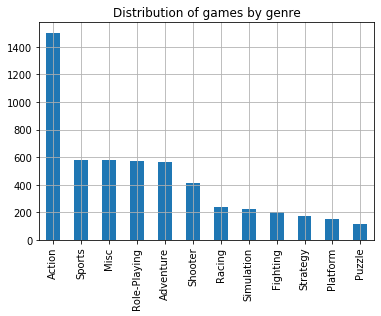

In [55]:
plt = df_actual['genre'].value_counts().plot(kind='bar', grid=True, title='Distribution of games by genre')

На первом месте расположились игры жанра экшен с существенным отрывом от остальных жанров. Это значит, что игры чаще всего выпускают в жанре экшен - более 1400, когда на втором месте жанр спорт с менее 600. Посмотрим, будет ли ситуация схожей, если мы оценим не просто распределение жанров игр, а также их прибыль:

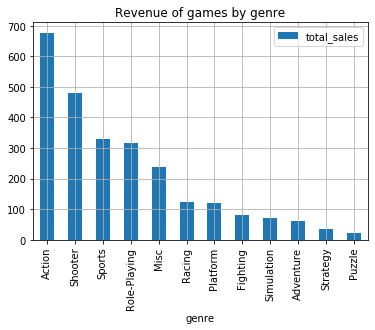

In [56]:
plt = pd.pivot_table(df_actual, index='genre', values='total_sales', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, title='Revenue of games by genre')

И вновь экшен на первом месте, но отрыв уже не такой большой. Экшен в сумме имеет продажи чуть менее 700 миллионов копий, когда на втором месте шутеры - чуть менее 500, хотя количество выпускаемых шутеров существенно меньше, чем игр экшена. Значит, шутеров хоть и меньше, но на 1 шутер приходится покупок больше, чем на 1 экшен. Наиболее низкие продажи имеют паззлы, хоть и выпускают их также совсем мало. 

### Вывод

Исследовательский анализ данных продемонстрировал, какие платформы в последнее время особо активно развиваются: `PS4`, `XOne`. С учётом специфики времени жизни платформы можем сделать вывод, что именно они наиболее хорошо подходят под продажи для 2017-ого года. У пользователей наиболее популярными жанрами являются экшен (чуть менее 700 миллионов продаж) и шутер (менее 500 миллионов продаж), поэтому, в первую очередь, стоит делать упор именно на эти жанры. Также выяснилось, что рейтинг критиков связан с количеством продаж игры, о чём говорит корреляция 0.4. Следовательно, если игра получит от критиков хорошие отзывы, у неё автоматически больше шансов на хорошую окупаемость.

Далее необходимо составить портрет пользователей отдельных регионов, чтобы рекламная компания соответствовала своей аудитории.

## Составление портретов пользователей

В  наших данных есть статистика продаж игры в трёх регионов - NA (Северная Америка), EU (Европа) и JP (Япония). Скорее всего, предпочтения и интересы пользователей меняются в зависимости от их места жительства, поэтому необходимо разобраться с регионами отдельно. Для начала посмотрим, как различается популярность платформ по регионам и выделим топ-5 для каждого:

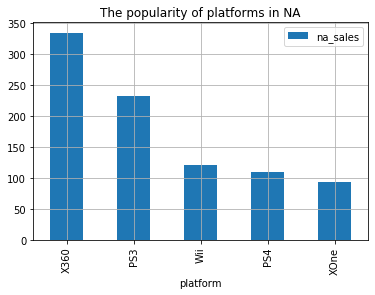

In [37]:
#группируем данные по платформе, считаем суммы продаж по платформам по NA, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5) \
                                .plot(kind='bar', grid=True, title='The popularity of platforms in NA')

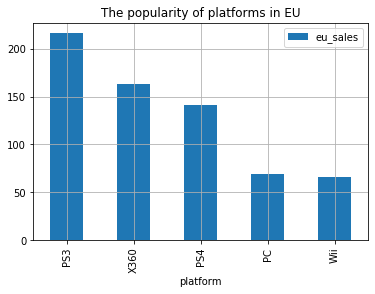

In [38]:
#группируем данные по платформе, считаем суммы продаж по платформам по EU, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5) \
                                .plot(kind='bar', grid=True, title='The popularity of platforms in EU')

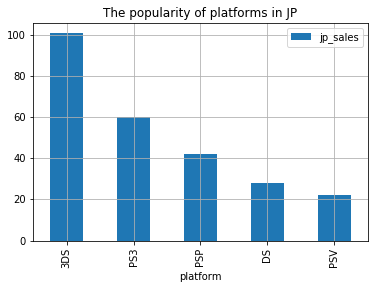

In [39]:
#группируем данные по платформе, считаем суммы продаж по платформам по JP, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5) \
                                .plot(kind='bar', grid=True, title='The popularity of platforms in JP')

Между регионами хоть и существуют отличия, есть некоторые общности. Например, `PS3` или `PS4` встречается везде в топ-5. Значит, эту платформу любят пользователи всех регионов. В Европе `PS3` даже находится на первом месте. В Северной Америке это место занимает `X360`. Видимо, это можно считать прекрасной иллюстрацией войны двух компаний. Если Вы выпускаете игру под аудиторию Европы, Вам может лучше подойти выпуск, в первую очередь, под PS, а если в Северной Америке - под XOne. Особое внимание стоит уделить тому, что в Японии `Xone` даже не представлен в топ-5, а на первом месте там платформа `3DS`. 

Оценим ситуацию с жанрами и вновь выделим топ-5 для каждого региона:

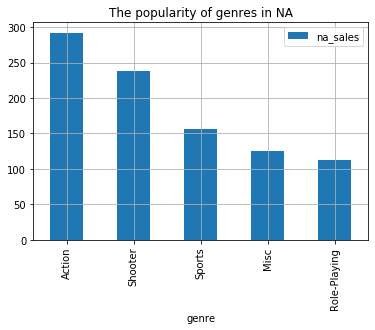

In [40]:
#группируем данные по жанрам, считаем суммы продаж по платформам по NA, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head() \
                                .plot(kind='bar', grid=True, title='The popularity of genres in NA')

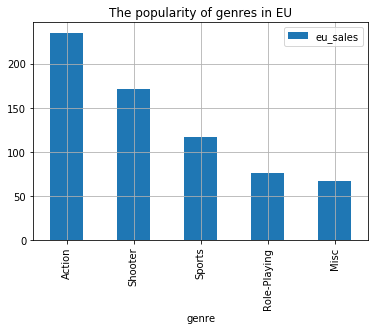

In [41]:
#группируем данные по жанрам, считаем суммы продаж по платформам по EU, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head() \
                                .plot(kind='bar', grid=True, title='The popularity of genres in EU')

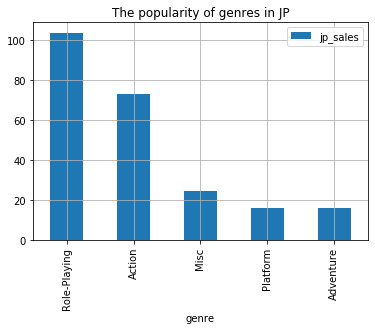

In [42]:
#группируем данные по жанрам, считаем суммы продаж по платформам по JP, после чего строим диаграмму по топ-5
plt = df_actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head() \
                                .plot(kind='bar', grid=True, title='The popularity of genres in JP')

Посмотрим, влияет ли рейтинг ESRB на продажи в регионах:

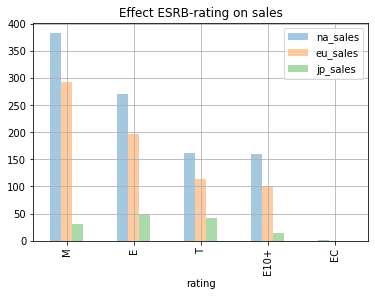

In [57]:
df_actual_esrb = df_actual.query('rating != "unknown"')
plt = df_actual_esrb.groupby(by='rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'}) \
                                        .sort_values(by='na_sales', ascending=False).head() \
                                        .plot(kind='bar', grid=True, alpha=0.4, title='Effect ESRB-rating on sales')

Можно сказать, что Европа и Северная Америка одинаково относятся к рейтингу `ESRB`, а вот в Японии ситуация немного другая. В Европе и Северной Америке чаще приобретают игры с ограничением 17+, а в Японии - 6+. Возможно, это связано с группами геймеров в регионах: в Европе и Северной Америке играет больше взрослых, а в Японии - детей и подростков. 

### Вывод

Для трёх регионов составили портрет типичных пользователей, в результате чего имеем следующее:
* Пользователи Северной Америки наиболее предпочтительны к `X360` и жанру экшен
* Пользователи Европы наиболее предпочтительны к `PS3` и жанру экшен
* Пользователи Японии наиболее предпочтительны к `3DS` и жанру `Role-Playing`

Рейтинг ассоциации `ESRB` демонстрирует нам, что наиболее часто в Северной Америке и Европе продаются игры категории 17+, а в Японии - 6+. Скорее всего это связано с самими игрокам в регионах: в первых двух у нас больше взрослых игроков, а в Японии - больше детей и подростков. Для окончательных выводов по этой специфике стоит провести полноценное исследование, а результаты учитывать в рекламных мероприятиях в различных регионах.

Перейдём к статистическому анализу данных.

## Статистический анализ данных

В завершении исследования проведём небольшой статистический анализ данных. На основании рейтинга существует предположение, что оценки платформ `Xone` и `PC` одинаковы. Проверим, так ли это на самом деле. Для начала сформулируем нулевую и альтернативную гипотезы:

* H0: "Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;
* H1: "Средние пользовательские рейтинги платформ `Xbox One` и `PC` разные.

Перед применением статистического теста создадим 2 таблицы, где в первой будет лишь платформа `XOne`, а во второй - лишь `PC`. Также поставим ограничение на пользовательский рейтинг более 0, чтобы не включать игры без рейтинга:

In [44]:
df_actual_xone = df_actual.query('platform == "XOne" and user_score > 0')
df_actual_pc = df_actual.query('platform == "PC" and user_score > 0')

Для проверки потребуется использовать двусторонний t-тест для независимых выборок, так как для проверки средних двух совокупностей необходимо применять t-тест, а двусторонний, так как нам не имеет значения, больше выручка от одного тарифа или меньше другого. Зададим уровень значимости в 0.01 для надёжных результатов. Найдём p-value и решим, отвергать ли нулевую гипотезу: 

In [45]:
#задаём уровень значимости и находим p-value для отвержения или принятия гипотезы
alpha = .01
results = st.ttest_ind(df_actual_xone['user_score'], df_actual_pc['user_score'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.980998110649032
Не получилось отвергнуть нулевую гипотезу


Получившееся p-value равно почти 1, что не даёт нам возможности отвергнуть нулевую гипотезу. Следовательно, разницы между оценками игр платформ `XOne` и `PC` нет.

Посмотрим, отличаются ли пользовательские рейтинги жанров `Action` и `Sports`. Сформулируем нулевую и альтернативную гипотезы:

* H0: "Средние пользовательские рейтинги жанров `Action` и `Sports` не отличаются;
* H1: "Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются.

Перед применением статистического теста вновь создадим 2 таблицы, где в первой будут игры жанра `Action`, а во второй - `Sports`. Ограничение на пользовательский рейтинг более 0 сохраняется.

In [46]:
df_actual_action = df_actual.query('genre == "Action" and user_score > 0')
df_actual_sports = df_actual.query('genre == "Sports" and user_score > 0')

Для проверки используем двусторонний t-тест для независимых выборок, так как для проверки средних двух независимых совокупностей нужно применять t-тест, а двусторонний, так как нет значения, больше рейтинги одного жанра или меньше. Зададим уровень значимости в 0.01 для надёжных результатов. Найдём p-value и решим, отвергать ли нулевую гипотезу:

In [47]:
#задаём уровень значимости и находим p-value для отвержения или принятия гипотезы
alpha = .01
results = st.ttest_ind(df_actual_action['user_score'], df_actual_sports['user_score'])
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.4355834472156065e-19
Отвергаем нулевую гипотезу


p-value получилось близким к 0. Следовательно, мы отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательские рейтинги жанров `Action` и `Sports` отличаются. 

### Вывод

Статистический анализ данных продемонстрировал нам следующее:
* Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые (p-value = 0.98)
* Средние пользовательские рейтинги жанров `Action` и `Sports` отличаются (p-value = 0.(0)1)

Из этого делаем вывод, что нет разницы, будет игра выпускаться на одной из двух платформ - это не повлияет на пользовательский рейтинг. Иная ситуация с жанрами экшен и спорт, которые имеют различные рейтинги. Следовательно, при планировании рекламной компании стоит отдельное внимание заострять на текущих средних рейтингах того или иного жанра в регионе.

## Вывод

Таким образом, проведённое исследование позволяет выявить закономерности успешности игры в 2017-ом году. Исследовательский анализ продемонстрировал, что срок активной жизни платформы составляет примерно 6 лет, поэтому наиболее подходящие для релизов игр в 2017-ом году платформы - это `PS4` и `XOne`. Несмотря на текущие показатели, они имеют активный рост за последние годы, из чего можем предсказать их популярность в 2017-ом. Отдельно необходимо упомянуть рейтинг критиков. Корреляция их оценок с количеством продаж игры составляет 0.4, следовательно, от них точно зависит определённая часть продаж игры.

Составление портретов пользователей отдельных регионов поможет при проведении рекламных мероприятий в конкретном регионе. В результате анализа получили следующие закономерности:
* Пользователи Северной Америки наиболее предпочтительны к `X360` и жанру экшен
* Пользователи Европы наиболее предпочтительны к `PS3` и жанру экшен
* Пользователи Японии наиболее предпочтительны к `3DS` и жанру `Role-Playing`

Одними из наиболее популярных жанров сегодня являются экшен, шутер и спорт, при этом статистический анализ продемонстрировал, что средние пользовательские рейтинги жанров экшен и спорт отличаются (p-value = 0.(0)1). Следовательно, при проведении компании необходимо оценивать конкретный жанр и его текущие рейтинги.